# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
# trade_df = pd.read_csv('train.csv')
# trade_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [3]:
# trade_df.shape

(24236806, 10)

In [4]:
# asset = pd.read_csv('asset_details.csv')
# asset.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


### Merging Trade df with Asset Data

In [5]:
# trade_df = trade_df.merge(asset, on = 'Asset_ID', how = 'left')

In [6]:
# trade_df.isna().sum()

timestamp          0
Asset_ID           0
Count              0
Open               0
High               0
Low                0
Close              0
Volume             0
VWAP               9
Target        750338
Weight             0
Asset_Name         0
dtype: int64

In [7]:
# import datetime

# # Convert 'timestamp' to a human-readable date-time format
# trade_df['timestamp'] = pd.to_datetime(trade_df['timestamp'], unit='s')

# # Remove the 'Target' column from the DataFrame
# trade_df = trade_df.drop(columns=['Target'])

# # Display the first few rows of the updated DataFrame to verify changes
# trade_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Weight,Asset_Name
0,2018-01-01 00:01:00,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,2.397895,Bitcoin Cash
1,2018-01-01 00:01:00,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,4.304065,Binance Coin
2,2018-01-01 00:01:00,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,6.779922,Bitcoin
3,2018-01-01 00:01:00,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,1.386294,EOS.IO
4,2018-01-01 00:01:00,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,2.079442,Ethereum Classic


In [8]:
# trade_df['timestamp'].min()

Timestamp('2018-01-01 00:01:00')

In [9]:
# trade_df['timestamp'].max()

Timestamp('2021-09-21 00:00:00')

### Converting the minute level trade_df to Daily Level DF

In [10]:
# import pandas as pd

# # Convert timestamps to pandas datetime
# trade_df['timestamp'] = pd.to_datetime(trade_df['timestamp'])

# # Group by Asset_ID and resample to daily, aggregating the data appropriately
# daily_df = trade_df.groupby('Asset_ID').resample('D', on='timestamp').agg({
#     'Open': 'first',
#     'High': 'max',
#     'Low': 'min',
#     'Close': 'last',
#     'Volume': 'sum',
#     'Count': 'sum',
#     'VWAP': 'last',
#     'Weight': 'last',
#     'Asset_Name': 'max'
# }).reset_index(level='Asset_ID')

In [42]:
daily_df = pd.read_csv('daily_df.csv')

In [11]:
daily_df.head()

,Asset_ID,Open,High,Low,Close,Volume,Count,VWAP,Weight,Asset_Name
timestamp,,,,,,,,,,
2018-01-01,0,8.5300,8.7000,7.8000,8.4500,654145.36,18200.0,8.416289,4.304065,Binance Coin
2018-01-02,0,8.4500,9.1133,8.0922,8.7150,1262489.43,29923.0,8.715540,4.304065,Binance Coin
2018-01-03,0,8.7151,9.4697,8.2653,9.3040,947392.65,24572.0,9.327360,4.304065,Binance Coin
2018-01-04,0,9.3040,9.6511,8.5595,9.1430,964494.94,26176.0,9.131448,4.304065,Binance Coin
2018-01-05,0,9.1350,16.8172,8.9651,14.8908,2764977.04,44906.0,14.872271,4.304065,Binance Coin


### Feature Engineering

In [12]:
import pandas as pd
import numpy as np

# Reset the index
daily_df.reset_index(inplace=True)
# Rename the 'index' column to 'Date'
daily_df.rename(columns={'timestamp': 'Date'}, inplace=True)

# Calculate SMA for 10 and 50 days
daily_df['sma_10'] = daily_df['Close'].rolling(window=10).mean()
daily_df['sma_50'] = daily_df['Close'].rolling(window=50).mean()

# Calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

daily_df['RSI'] = calculate_rsi(daily_df['Close'], period=14)

daily_df.head()

,Date,Asset_ID,Open,High,Low,Close,Volume,Count,VWAP,Weight,Asset_Name,sma_10,sma_50,RSI
0,2018-01-01,0,8.5300,8.7000,7.8000,8.4500,654145.36,18200.0,8.416289,4.304065,Binance Coin,NaN,NaN,NaN
1,2018-01-02,0,8.4500,9.1133,8.0922,8.7150,1262489.43,29923.0,8.715540,4.304065,Binance Coin,NaN,NaN,NaN
2,2018-01-03,0,8.7151,9.4697,8.2653,9.3040,947392.65,24572.0,9.327360,4.304065,Binance Coin,NaN,NaN,NaN
3,2018-01-04,0,9.3040,9.6511,8.5595,9.1430,964494.94,26176.0,9.131448,4.304065,Binance Coin,NaN,NaN,NaN
4,2018-01-05,0,9.1350,16.8172,8.9651,14.8908,2764977.04,44906.0,14.872271,4.304065,Binance Coin,NaN,NaN,NaN


### Dropping Null Records

In [13]:
# Drop rows with any null values
daily_df.dropna(inplace=True)

### Checking for Multicollinearity

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting numerical columns (excluding 'Date' and 'Asset_Name' as they are not numeric)
numerical_df = daily_df.select_dtypes(include=[np.number])

# Adding a constant column for intercept
X = add_constant(numerical_df)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Here we round the VIF scores to 0 decimal places and convert to integers
vif_data["VIF"] = [int(round(variance_inflation_factor(X.values, i), 0)) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,24
1,Asset_ID,2
2,Open,1563
3,High,2732
4,Low,899
5,Close,1654608
6,Volume,1
7,Count,2
8,VWAP,1637253
9,Weight,2


In [15]:
# Removing fields with High VIF

daily_df = daily_df.drop(columns=['VWAP', 'Open', 'High', 'Low'])

In [16]:
# Dropping sma_10, sma_50, RSI at this point (will be calculating them again post the test-train split to avoid data leakage)

daily_df = daily_df.drop(columns=['sma_10', 'sma_50', 'RSI'])

In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting numerical columns (excluding 'Date' and 'Asset_Name' as they are not numeric)
numerical_df = daily_df.select_dtypes(include=[np.number])

# Adding a constant column for intercept
X = add_constant(numerical_df)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Here we round the VIF scores to 0 decimal places and convert to integers
vif_data["VIF"] = [int(round(variance_inflation_factor(X.values, i), 0)) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,16
1,Asset_ID,2
2,Close,2
3,Volume,1
4,Count,2
5,Weight,2


In [18]:
daily_df.to_csv("daily_df.csv", index=False)
daily_df.head()

,Date,Asset_ID,Close,Volume,Count,Weight,Asset_Name
49,2018-02-19,0,11.0601,1316213.81,51420.0,4.304065,Binance Coin
50,2018-02-20,0,9.8888,2357501.48,75120.0,4.304065,Binance Coin
51,2018-02-21,0,9.3799,2277445.93,82114.0,4.304065,Binance Coin
52,2018-02-22,0,8.8600,1792778.94,67214.0,4.304065,Binance Coin
53,2018-02-23,0,9.6930,1621549.49,60333.0,4.304065,Binance Coin


# Model Building

## Sequential Neural Network Model

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from math import sqrt

daily_df.sort_values('Date', inplace=True)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Manually calculate SMA
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Manually calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Placeholder for results and detailed predictions
results = []
detailed_predictions = []

# Temporal split settings
split_date = '2021-01-01'  # Adjust this date to your dataset and needs

# Split your dataset based on the split_date
train_data = daily_df[daily_df['Date'] < split_date]
test_data = daily_df[daily_df['Date'] >= split_date]

# Iterate through each Asset_ID
for asset_id, asset_train_data in train_data.groupby('Asset_ID'):
    print(f"Processing Asset ID: {asset_id}")
    asset_test_data = test_data[test_data['Asset_ID'] == asset_id]
    
    # Calculate Moving Averages and RSI for the training part
    asset_train_data['SMA_10'] = calculate_sma(asset_train_data['Close'], window=10)
    asset_train_data['SMA_50'] = calculate_sma(asset_train_data['Close'], window=50)
    asset_train_data['RSI'] = calculate_rsi(asset_train_data['Close'], window=14)
    
    # Fill NaN values generated by SMA and RSI calculations in the training set
    asset_train_data.fillna(method='bfill', inplace=True)
    
    # Repeat calculation for the test part (important to avoid data leakage)
    asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
    asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
    asset_test_data['RSI'] = calculate_rsi(asset_test_data['Close'], window=14)
    
    # Fill NaN values for the test set
    asset_test_data.fillna(method='bfill', inplace=True)
    
    # Prepare data for model training and testing
    X_train = asset_train_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_train = asset_train_data['Close'].values
    X_test = asset_test_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_test = asset_test_data['Close'].values
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the neural network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Predict the Close values for the test set
    y_pred = model.predict(X_test_scaled).flatten()
    
    # Calculate evaluation metrics for the test set
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the evaluation metrics
    results.append({
        'Asset_ID': asset_id,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse
    })
    
    # Store detailed predictions
    detailed_predictions.append(pd.DataFrame({
        'Date': asset_test_data['Date'],
        'Asset_ID': asset_id,
        'Actual_Close': y_test,
        'Predicted_Close': y_pred
    }))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Evaluation Metrics:")
print(results_df)

# Concatenate detailed predictions into a single DataFrame
final_predictions_df = pd.concat(detailed_predictions, ignore_index=True)
print("\nDetailed Predictions:")
print(final_predictions_df)

Processing Asset ID: 0


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 339us/step
Processing Asset ID: 1


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 309us/step
Processing Asset ID: 2


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 311us/step
Processing Asset ID: 3


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 328us/step
Processing Asset ID: 4


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 315us/step
Processing Asset ID: 5


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 311us/step
Processing Asset ID: 6


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 349us/step
Processing Asset ID: 7


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 316us/step
Processing Asset ID: 8


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 323us/step
Processing Asset ID: 9


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 348us/step
Processing Asset ID: 10


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 319us/step
Processing Asset ID: 11


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 362us/step
Processing Asset ID: 12


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 356us/step
Processing Asset ID: 13


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1671871286.py:56: SettingWithCo

9/9 [==============================] - 0s 342us/step
Evaluation Metrics:
    Asset_ID         MAPE           MAE          RMSE
0          0    16.118191     44.996548     64.075124
1          1    52.110524  22503.672605  23758.298598
2          2    12.079047     76.183960    118.419781
3          3    19.358150      0.202817      0.273273
4          4  3314.974123      4.847666      6.483432
5          5     7.861252      0.413603      0.633224
6          6    11.640882    237.613821    352.122192
7          7     7.828231      3.181303      5.569851
8          8    13.784349      0.137331      0.195759
9          9    13.588930     25.630635     38.933479
10        10    58.045178   1603.284049   1927.675075
11        11    12.540928     31.849944     53.749174
12        12    51.739633      0.198868      0.266192
13        13   182.364253      0.157081      0.227549

Detailed Predictions:
           Date  Asset_ID  Actual_Close  Predicted_Close
0    2021-01-01         0     37.7511

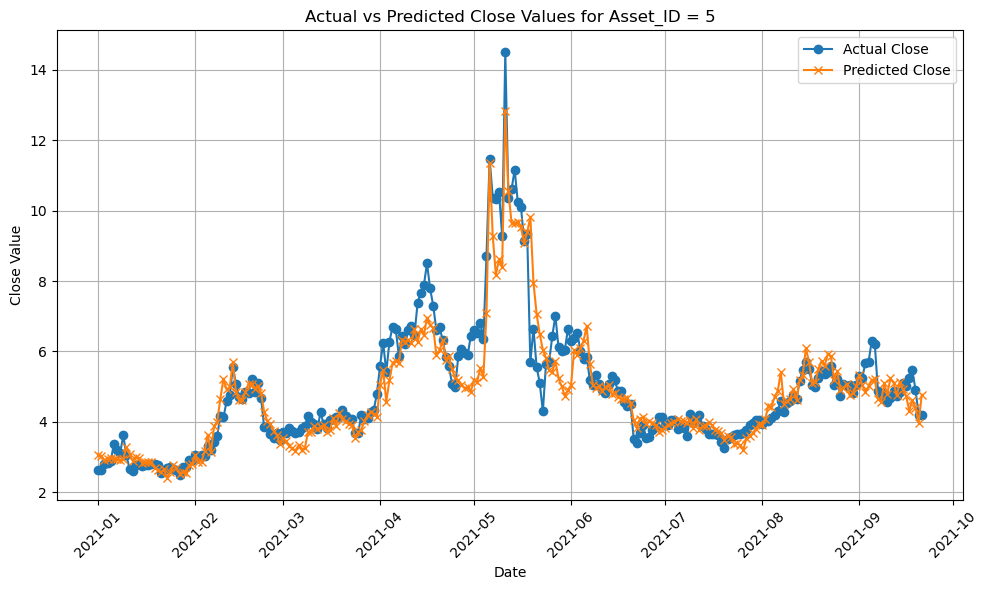

In [21]:
import matplotlib.pyplot as plt

# Filter the detailed predictions DataFrame for Asset_ID = 5
asset_5_predictions = final_predictions_df[final_predictions_df['Asset_ID'] == 5]

# Plot predicted vs actual close values
plt.figure(figsize=(10, 6))
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Actual_Close'], label='Actual Close', marker='o')
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Predicted_Close'], label='Predicted Close', marker='x')
plt.title('Actual vs Predicted Close Values for Asset_ID = 5')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Stacked LSTM

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from math import sqrt

daily_df.sort_values('Date', inplace=True)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Manually calculate SMA
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Manually calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Placeholder for results and detailed predictions
results = []
detailed_predictions = []

# Temporal split settings
split_date = '2021-01-01'  # Adjust this date to your dataset and needs

# Split your dataset based on the split_date
train_data = daily_df[daily_df['Date'] < split_date]
test_data = daily_df[daily_df['Date'] >= split_date]

# Iterate through each Asset_ID
for asset_id, asset_train_data in train_data.groupby('Asset_ID'):
    print(f"Processing Asset ID: {asset_id}")
    asset_test_data = test_data[test_data['Asset_ID'] == asset_id]
    
    # Calculate Moving Averages and RSI for the training part
    asset_train_data['SMA_10'] = calculate_sma(asset_train_data['Close'], window=10)
    asset_train_data['SMA_50'] = calculate_sma(asset_train_data['Close'], window=50)
    asset_train_data['RSI'] = calculate_rsi(asset_train_data['Close'], window=14)
    
    # Fill NaN values generated by SMA and RSI calculations in the training set
    asset_train_data.fillna(method='bfill', inplace=True)
    
    # Repeat calculation for the test part (important to avoid data leakage)
    asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
    asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
    asset_test_data['RSI'] = calculate_rsi(asset_test_data['Close'], window=14)
    
    # Fill NaN values for the test set
    asset_test_data.fillna(method='bfill', inplace=True)
    
    # Prepare data for model training and testing
    X_train = asset_train_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_train = asset_train_data['Close'].values
    X_test = asset_test_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_test = asset_test_data['Close'].values
    
     # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Reshape for LSTM [samples, timesteps, features]
    # Assuming each sample is one timestep
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    # Define the Stacked LSTM model
    model = Sequential([
        LSTM(units=64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(0.2),
        LSTM(units=64, return_sequences=True),  # Second LSTM layer
        Dropout(0.2),
        LSTM(units=64, return_sequences=False),  # Add more LSTM layers as needed
        Dropout(0.2),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
  
    # Predict the Close values for the test set
    y_pred = model.predict(X_test_reshaped).flatten()
    
    # Calculate evaluation metrics for the test set
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the evaluation metrics
    results.append({
        'Asset_ID': asset_id,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse
    })
    
    # Store detailed predictions
    detailed_predictions.append(pd.DataFrame({
        'Date': asset_test_data['Date'],
        'Asset_ID': asset_id,
        'Actual_Close': y_test,
        'Predicted_Close': y_pred
    }))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Evaluation Metrics:")
print(results_df)

# Concatenate detailed predictions into a single DataFrame
final_predictions_df = pd.concat(detailed_predictions, ignore_index=True)
print("\nDetailed Predictions:")
print(final_predictions_df)

Processing Asset ID: 0


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
33/33 [==============================] - 2s 2ms/step - loss: 371.8239
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 325.8504
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 197.2780
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 102.0857
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 47.3876
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 35.3848
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 29.5365
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 25.3670
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 21.8978
Epoch 10/50
33/33 [==============================] - 0s 1ms/step - loss: 19.3882
Epoch 11/50
33/33 [==============================] - 0s 2ms/step - loss: 16.8566
Epoch 12/50
33/33 [==============================] - 0s 2ms/step - loss: 15.0047
Epoch 13/50
33/33 [==============

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 1s 1ms/step - loss: 88685312.0000
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 88662656.0000
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 88573592.0000
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 88455680.0000
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 88358080.0000
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 88304016.0000
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 88262016.0000
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 88221104.0000
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 88183448.0000
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 88145648.0000
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 88111416.0000
Epoch 12/50
35/35 [==============================] -

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 1s 1ms/step - loss: 392642.9688
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 390887.3125
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 385686.5625
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 381659.4375
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 378070.3438
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 374295.8438
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 371544.7812
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 369549.3125
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 367689.2812
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 365843.1875
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 364126.2812
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 3

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

31/31 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 2.8489e-04
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 2.2931e-04
Epoch 4/50
31/31 [==============================] - 0s 1ms/step - loss: 1.9384e-04
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 1.6474e-04
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 1.6458e-04
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 1.3382e-04
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 1.7162e-04
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 1.3262e-04
Epoch 10/50
31/31 [==============================] - 0s 2ms/step - loss: 1.3079e-04
Epoch 11/50
31/31 [==============================] - 0s 2ms/step - loss: 1.6459e-04
Epoch 12/50
31/31 [==============================] - 0s 2ms/step - loss: 1.1652e-04
Epoch 13/50
31/3

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

20/20 [==============================] - 1s 1ms/step - loss: 3.2574e-06
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 1.2817e-06
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 9.3549e-07
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 7.0673e-07
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 4.6520e-07
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 6.0997e-07
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 4.7712e-07
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 3.9831e-07
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 3.3139e-07
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 3.7525e-07
Epoch 11/50
20/20 [==============================] - 0s 2ms/step - loss: 2.6818e-07
Epoch 12/50
20/20 [==============================] - 0s 2ms/step - loss: 3.1771e-07
Epoch 13/50


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 1s 1ms/step - loss: 33.1045
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 21.0088
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 4.2345
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9561
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 1.5884
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 1.3429
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 1.1880
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 1.0846
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.9432
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 0.8428
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 0.9605
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 0.9465
Epoch 13/50
35/35 [============================

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

35/35 [==============================] - 1s 2ms/step - loss: 156534.3281
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 155477.3281
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 152190.5625
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 148548.4062
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 145537.6406
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 143675.3594
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 142262.8125
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 140882.9844
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 139623.2656
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 138517.7031
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 137320.8750
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 136240.5781


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 2s 1ms/step - loss: 136.5459
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 108.7439
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 47.3291
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 24.3420
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 17.1329
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 14.8857
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 13.3810
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 12.4490
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 10.6556
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 9.5913
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 9.0556
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 7.8784
Epoch 13/50
35/35 [===================

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
31/31 [==============================] - 1s 1ms/step - loss: 0.2022
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 3/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 4/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 6/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 7/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 8/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 9/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 10/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 11/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 12/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 13/50
31/31 [==============================

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 1s 2ms/step - loss: 7945.1216
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 7721.0376
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 6957.5972
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 6098.1953
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 5473.0181
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 5163.4482
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 4914.6113
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 4700.1768
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 4519.0073
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 4330.7964
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 4162.1597
Epoch 12/50
35/35 [==============================] - 0s 2ms/step - loss: 4024.3079
Epoch 13/50
3

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

15/15 [==============================] - 2s 2ms/step - loss: 346707.1250
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 346601.0625
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 346363.6250
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 345597.0000
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 343498.0312
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 340264.2812
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 336655.5000
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 332395.3125
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 328962.7188
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 326861.5625
Epoch 11/50
15/15 [==============================] - 0s 2ms/step - loss: 325286.9062
Epoch 12/50
15/15 [==============================] - 0s 2ms/step - loss: 323856.8438


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
35/35 [==============================] - 1s 2ms/step - loss: 16196.1152
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 15874.5088
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 14875.2402
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 13747.6982
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 12721.3262
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 12198.6064
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 11822.1152
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 11455.0283
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 11137.0322
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 10840.9766
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 10539.9893
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 10322.5625
E

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
33/33 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 8.0459e-04
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 3.9712e-04
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 3.6765e-04
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 4.0919e-04
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 4.1564e-04
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 3.1315e-04
Epoch 8/50
33/33 [==============================] - 0s 1ms/step - loss: 3.6889e-04
Epoch 9/50
33/33 [==============================] - 0s 1ms/step - loss: 3.1461e-04
Epoch 10/50
33/33 [==============================] - 0s 1ms/step - loss: 3.6553e-04
Epoch 11/50
33/33 [==============================] - 0s 1ms/step - loss: 3.4444e-04
Epoch 12/50
33/33 [==============================] - 0s 1ms/step - loss: 3.8688e-04
Epoch

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/2106183392.py:56: SettingWithCo

Epoch 1/50
34/34 [==============================] - 1s 1ms/step - loss: 1.4919e-04
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 2.0175e-05
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 1.5861e-05
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 1.6794e-05
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 1.6071e-05
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 1.3466e-05
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 1.3210e-05
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 1.2602e-05
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 1.1483e-05
Epoch 10/50
34/34 [==============================] - 0s 1ms/step - loss: 1.2295e-05
Epoch 11/50
34/34 [==============================] - 0s 2ms/step - loss: 1.1324e-05
Epoch 12/50
34/34 [==============================] - 0s 2ms/step - loss: 1.1232e-05
E

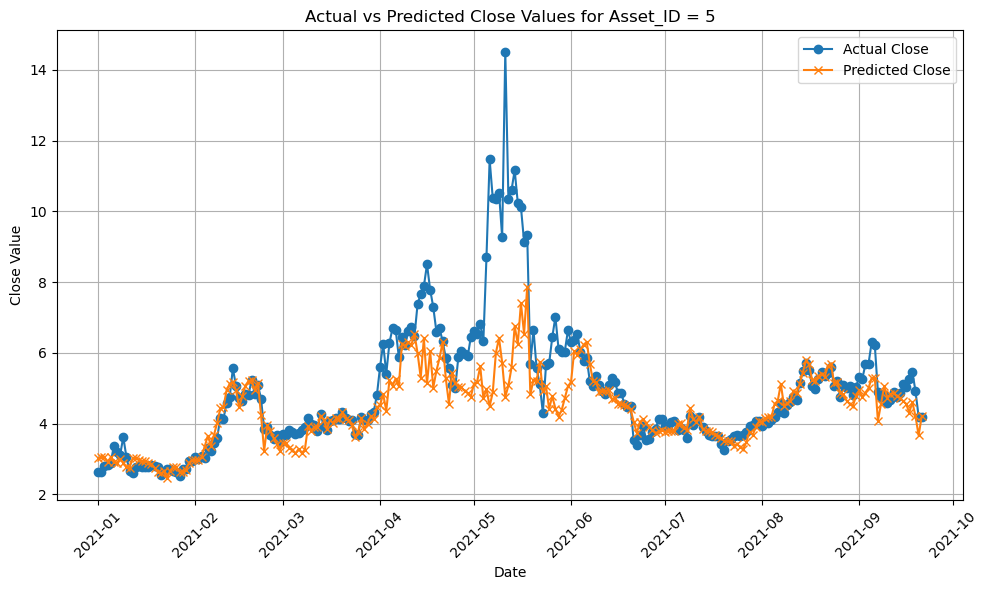

In [24]:
import matplotlib.pyplot as plt

# Filter the detailed predictions DataFrame for Asset_ID = 5
asset_5_predictions = final_predictions_df[final_predictions_df['Asset_ID'] == 5]

# Plot predicted vs actual close values
plt.figure(figsize=(10, 6))
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Actual_Close'], label='Actual Close', marker='o')
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Predicted_Close'], label='Predicted Close', marker='x')
plt.title('Actual vs Predicted Close Values for Asset_ID = 5')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Bidirectional LSTM

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from math import sqrt

daily_df.sort_values('Date', inplace=True)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Manually calculate SMA
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Manually calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Placeholder for results and detailed predictions
results = []
detailed_predictions = []

# Temporal split settings
split_date = '2021-01-01'  # Adjust this date to your dataset and needs

# Split your dataset based on the split_date
train_data = daily_df[daily_df['Date'] < split_date]
test_data = daily_df[daily_df['Date'] >= split_date]

# Iterate through each Asset_ID
for asset_id, asset_train_data in train_data.groupby('Asset_ID'):
    print(f"Processing Asset ID: {asset_id}")
    asset_test_data = test_data[test_data['Asset_ID'] == asset_id]
    
    # Calculate Moving Averages and RSI for the training part
    asset_train_data['SMA_10'] = calculate_sma(asset_train_data['Close'], window=10)
    asset_train_data['SMA_50'] = calculate_sma(asset_train_data['Close'], window=50)
    asset_train_data['RSI'] = calculate_rsi(asset_train_data['Close'], window=14)
    
    # Fill NaN values generated by SMA and RSI calculations in the training set
    asset_train_data.fillna(method='bfill', inplace=True)
    
    # Repeat calculation for the test part (important to avoid data leakage)
    asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
    asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
    asset_test_data['RSI'] = calculate_rsi(asset_test_data['Close'], window=14)
    
    # Fill NaN values for the test set
    asset_test_data.fillna(method='bfill', inplace=True)
    
    # Prepare data for model training and testing
    X_train = asset_train_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_train = asset_train_data['Close'].values
    X_test = asset_test_data[['Volume', 'Count', 'SMA_10', 'SMA_50', 'RSI']].values
    y_test = asset_test_data['Close'].values
    
     # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Reshape for LSTM [samples, timesteps, features]
    # Assuming each sample is one timestep
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    # Define the Bidirectional LSTM model
    model = Sequential([
        Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))),
        Dropout(0.2),
        Bidirectional(LSTM(units=64, return_sequences=False)),
        Dropout(0.2),
        Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
    
    # Predict the Close values for the test set
    y_pred = model.predict(X_test_reshaped).flatten()
    
    # Calculate evaluation metrics for the test set
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the evaluation metrics
    results.append({
        'Asset_ID': asset_id,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse
    })
    
    # Store detailed predictions
    detailed_predictions.append(pd.DataFrame({
        'Date': asset_test_data['Date'],
        'Asset_ID': asset_id,
        'Actual_Close': y_test,
        'Predicted_Close': y_pred
    }))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Evaluation Metrics:")
print(results_df)

# Concatenate detailed predictions into a single DataFrame
final_predictions_df = pd.concat(detailed_predictions, ignore_index=True)
print("\nDetailed Predictions:")
print(final_predictions_df)

Processing Asset ID: 0
Epoch 1/50


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

33/33 [==============================] - 2s 2ms/step - loss: 367.5023
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 305.2332
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 175.2235
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 89.8802
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 30.6035
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 9.5514
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 7.5789
Epoch 8/50
33/33 [==============================] - 0s 1ms/step - loss: 6.1116
Epoch 9/50
33/33 [==============================] - 0s 1ms/step - loss: 5.7283
Epoch 10/50
33/33 [==============================] - 0s 1ms/step - loss: 5.4120
Epoch 11/50
33/33 [==============================] - 0s 1ms/step - loss: 4.6190
Epoch 12/50
33/33 [==============================] - 0s 1ms/step - loss: 4.2275
Epoch 13/50
33/33 [==============================] -

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 2ms/step - loss: 88683232.0000
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 88650400.0000
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 88558848.0000
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 88434848.0000
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 88282144.0000
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 88110472.0000
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 87972704.0000
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 87868080.0000
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 87781608.0000
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 87700760.0000
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 87625816.0000
Epoch 12/50
35/35 [==============================] - 0s 1ms/ste

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 2ms/step - loss: 392459.5625
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 389735.5625
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 383638.4688
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 378181.4688
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 372961.1562
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 367588.4375
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 361780.5625
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 356009.0625
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 351099.4062
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 346983.7812
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 343594.9688
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 340225.3750


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

31/31 [==============================] - 2s 1ms/step - loss: 0.0023
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 2.3594e-04
Epoch 3/50
31/31 [==============================] - 0s 1ms/step - loss: 1.9969e-04
Epoch 4/50
31/31 [==============================] - 0s 1ms/step - loss: 1.8979e-04
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 1.7035e-04
Epoch 6/50
31/31 [==============================] - 0s 1ms/step - loss: 1.5362e-04
Epoch 7/50
31/31 [==============================] - 0s 1ms/step - loss: 1.3383e-04
Epoch 8/50
31/31 [==============================] - 0s 1ms/step - loss: 1.5257e-04
Epoch 9/50
31/31 [==============================] - 0s 1ms/step - loss: 1.2840e-04
Epoch 10/50
31/31 [==============================] - 0s 1ms/step - loss: 1.2505e-04
Epoch 11/50
31/31 [==============================] - 0s 1ms/step - loss: 1.3554e-04
Epoch 12/50
31/31 [==============================] - 0s 1ms/step - loss: 1.1228e-04
Epoch 13/50
31/3

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

20/20 [==============================] - 2s 2ms/step - loss: 1.2162e-04
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 8.9592e-05
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 6.9509e-05
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 5.6222e-05
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 4.1586e-05
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 3.3858e-05
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 3.0204e-05
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 2.5656e-05
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 1.5038e-05
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 1.9401e-05
Epoch 11/50
20/20 [==============================] - 0s 1ms/step - loss: 1.0773e-05
Epoch 12/50
20/20 [==============================] - 0s 1ms/step - loss: 1.2036e-05
Epoch 13/50


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 1ms/step - loss: 31.9899
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 17.1242
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 4.8502
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 1.6188
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 1.0822
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 0.8061
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 0.6800
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 0.6716
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5337
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5346
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5364
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5141
Epoch 13/50
35/35 [==============================] - 0s 1m

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 1ms/step - loss: 156408.9688
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 154883.1250
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 150954.7812
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 146767.4219
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 141917.3594
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 136532.9844
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 132560.5000
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 129480.1641
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 126819.4297
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 124470.1875
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 122274.7188
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 120307.6406


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 1ms/step - loss: 133.2975
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 94.9560
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 40.5224
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 15.3203
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 8.2752
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 7.2172
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 5.7712
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 4.8709
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 4.3526
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 3.5806
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 3.1378
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 2.9683
Epoch 13/50
35/35 [==============================] - 0s

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

31/31 [==============================] - 2s 1ms/step - loss: 0.1470
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 3/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 4/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 8/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 9/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 10/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 11/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 12/50
31/31 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 13/50
31/31 [==============================] - 0s 1ms/

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 2ms/step - loss: 7917.4697
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 7595.5615
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 6770.4858
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 5890.5854
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 4845.6299
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 3966.5430
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 3480.8113
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 3164.7717
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 2940.1060
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 2740.3958
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 2572.9343
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 2431.2180
Epoch 13/50
35/35 [=====

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

15/15 [==============================] - 3s 2ms/step - loss: 346682.1875
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 346488.6250
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 346069.8750
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 345018.1875
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 342764.7812
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 339481.3438
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 335629.4688
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 331881.9375
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 327424.3125
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 322198.1250
Epoch 11/50
15/15 [==============================] - 0s 2ms/step - loss: 316664.8750
Epoch 12/50
15/15 [==============================] - 0s 1ms/step - loss: 311410.2188


/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

35/35 [==============================] - 2s 2ms/step - loss: 16148.5127
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 15599.9014
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 14432.4541
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 13254.1699
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 11767.9395
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 10368.1992
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 9430.8037
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 8798.9414
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 8318.9551
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 7876.3496
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 7508.8535
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 7218.6899
Epoch 13/50
35/35 

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

33/33 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 6.2168e-04
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 3.9669e-04
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 3.5042e-04
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 2.7935e-04
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 3.1642e-04
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 3.6617e-04
Epoch 8/50
33/33 [==============================] - 0s 1ms/step - loss: 2.9698e-04
Epoch 9/50
33/33 [==============================] - 0s 1ms/step - loss: 2.9069e-04
Epoch 10/50
33/33 [==============================] - 0s 1ms/step - loss: 2.8986e-04
Epoch 11/50
33/33 [==============================] - 0s 1ms/step - loss: 2.6060e-04
Epoch 12/50
33/33 [==============================] - 0s 1ms/step - loss: 2.5912e-04
Epoch 13/50
33/3

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_10'] = calculate_sma(asset_test_data['Close'], window=10)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_test_data['SMA_50'] = calculate_sma(asset_test_data['Close'], window=50)
/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_63160/1633733053.py:56: SettingWithCo

34/34 [==============================] - 2s 1ms/step - loss: 2.1419e-04
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 7.9259e-05
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 7.5238e-05
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 4.5707e-05
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 4.1457e-05
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 4.3011e-05
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 2.7490e-05
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 2.4873e-05
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 2.5140e-05
Epoch 10/50
34/34 [==============================] - 0s 1ms/step - loss: 2.4307e-05
Epoch 11/50
34/34 [==============================] - 0s 1ms/step - loss: 1.8928e-05
Epoch 12/50
34/34 [==============================] - 0s 1ms/step - loss: 1.9581e-05
Epoch 13/50


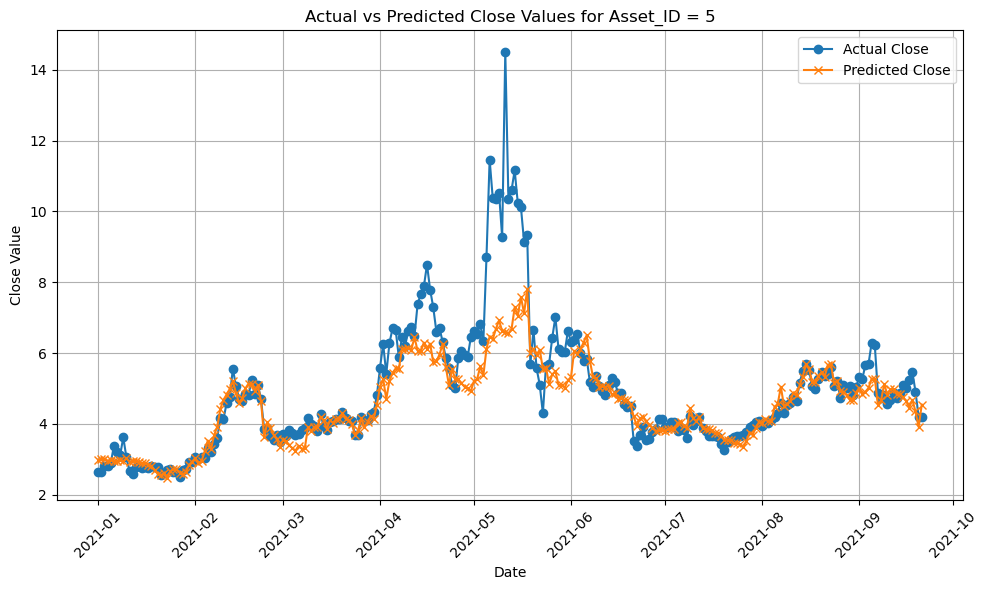

In [27]:
import matplotlib.pyplot as plt

# Filter the detailed predictions DataFrame for Asset_ID = 5
asset_5_predictions = final_predictions_df[final_predictions_df['Asset_ID'] == 5]

# Plot predicted vs actual close values
plt.figure(figsize=(10, 6))
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Actual_Close'], label='Actual Close', marker='o')
plt.plot(asset_5_predictions['Date'], asset_5_predictions['Predicted_Close'], label='Predicted Close', marker='x')
plt.title('Actual vs Predicted Close Values for Asset_ID = 5')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Portfolio Optimization

#### Choosing Bi-Directional LSTM Predictions

In [28]:
final_predictions_df.head()

,Date,Asset_ID,Actual_Close,Predicted_Close
0,2021-01-01,0,37.75110,35.635456
1,2021-01-02,0,38.21650,35.715515
2,2021-01-03,0,41.23610,35.805416
3,2021-01-04,0,41.11765,35.791111
4,2021-01-05,0,41.77595,35.760994


In [29]:
daily_df.head()

,Date,Asset_ID,Close,Volume,Count,Weight,Asset_Name
6228,2018-01-01,5,7.638,1.727143e+06,13640.0,1.386294,EOS.IO
1360,2018-01-01,1,13432.918,5.782304e+04,365257.0,6.779922,Bitcoin
14131,2018-01-01,11,341.175,2.655136e+04,8536.0,1.609438,Monero
11540,2018-01-01,9,224.108,4.789200e+05,120933.0,2.397895,Litecoin
2720,2018-01-01,2,2321.520,2.330180e+04,59257.0,2.397895,Bitcoin Cash


In [30]:
import pandas as pd

# Calculate 'Next_Day_Close' as the actual close of the next day
final_predictions_df['Next_Day_Close'] = final_predictions_df['Actual_Close'].shift(-1)

# Calculate 'Next_Day_Close' as the actual close of the next day
final_predictions_df['Next_Day_Predicted_Close'] = final_predictions_df['Predicted_Close'].shift(-1)

# Calculate 'Predicted_percentage_return'
# Formula: ((Next_Day_Predicted_Close / Actual_Close) - 1) * 100
final_predictions_df['Predicted_percentage_return'] = ((final_predictions_df['Next_Day_Predicted_Close'] / final_predictions_df['Actual_Close']) - 1) * 100

final_predictions_df.head()

,Date,Asset_ID,Actual_Close,Predicted_Close,Next_Day_Close,Next_Day_Predicted_Close,Predicted_percentage_return
0,2021-01-01,0,37.75110,35.635456,38.21650,35.715515,-5.392121
1,2021-01-02,0,38.21650,35.715515,41.23610,35.805416,-6.309013
2,2021-01-03,0,41.23610,35.805416,41.11765,35.791111,-13.204423
3,2021-01-04,0,41.11765,35.791111,41.77595,35.760994,-13.027632
4,2021-01-05,0,41.77595,35.760994,42.22035,35.776676,-14.360592


In [31]:
asset.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


#### Preparing the Dataset for Portfolio Optimization

In [32]:
portfolio_optimization_df = final_predictions_df.merge(asset[['Asset_ID', 'Asset_Name']], on='Asset_ID', how='left')
portfolio_optimization_df.head()

,Date,Asset_ID,Actual_Close,Predicted_Close,Next_Day_Close,Next_Day_Predicted_Close,Predicted_percentage_return,Asset_Name
0,2021-01-01,0,37.75110,35.635456,38.21650,35.715515,-5.392121,Binance Coin
1,2021-01-02,0,38.21650,35.715515,41.23610,35.805416,-6.309013,Binance Coin
2,2021-01-03,0,41.23610,35.805416,41.11765,35.791111,-13.204423,Binance Coin
3,2021-01-04,0,41.11765,35.791111,41.77595,35.760994,-13.027632,Binance Coin
4,2021-01-05,0,41.77595,35.760994,42.22035,35.776676,-14.360592,Binance Coin


In [33]:
# Removing the unnecessary fields

portfolio_optimization_df = portfolio_optimization_df.drop(columns=['Predicted_Close', 'Next_Day_Predicted_Close'])

In [34]:
# Rename the 'Actual_Close' column to 'Close'
portfolio_optimization_df.rename(columns={'Actual_Close': 'Close'}, inplace=True)

In [35]:
portfolio_optimization_df.head()

,Date,Asset_ID,Close,Next_Day_Close,Predicted_percentage_return,Asset_Name
0,2021-01-01,0,37.75110,38.21650,-5.392121,Binance Coin
1,2021-01-02,0,38.21650,41.23610,-6.309013,Binance Coin
2,2021-01-03,0,41.23610,41.11765,-13.204423,Binance Coin
3,2021-01-04,0,41.11765,41.77595,-13.027632,Binance Coin
4,2021-01-05,0,41.77595,42.22035,-14.360592,Binance Coin


#### Portfolio Optmization Algorithm

#### 6 Month Investment Timeline

In [36]:
import pandas as pd

# Initialize simulation parameters
initial_balance = 100000
portfolio = {}  # Dictionary to hold portfolio holdings: {asset_name: [quantity, purchase_price]}
balance = initial_balance

# Define strategy parameters
dynamic_stop_loss_threshold = 0.8  # Dynamic stop-loss threshold (80% of purchase price)
profit_target = 1.2  # Sell assets when they reach 120% of purchase price

balance_portfolio_df = pd.DataFrame(columns=['Date', 'Wallet Balance', 'Portfolio Value'])

stop_date = pd.to_datetime("2021-07-01")  # Define stop date

for date, daily_data in portfolio_optimization_df.groupby('Date'):
    current_date = pd.to_datetime(date)  # Convert to datetime for comparison
    if current_date > stop_date:
        break  # Stop the simulation if the current date exceeds the stop date

    # Selling assets from the portfolio if conditions are met (dynamic stop-loss and profit-taking)
    assets_to_remove = []
    for asset in portfolio.keys():
        asset_daily_data = daily_data[daily_data['Asset_Name'] == asset]
        if not asset_daily_data.empty:
            current_price = asset_daily_data.iloc[0]['Close']
            purchase_price = portfolio[asset][1]
            # Check for stop-loss and profit target
            if current_price < purchase_price * dynamic_stop_loss_threshold or current_price > purchase_price * profit_target:
                balance += portfolio[asset][0] * current_price
                assets_to_remove.append(asset)
    for asset in assets_to_remove:
        del portfolio[asset]

    # Identifying potential assets to buy based on positive predicted returns
    potential_buys = daily_data[daily_data['Predicted_percentage_return'] > 0]
    sorted_buys = potential_buys.sort_values(by='Predicted_percentage_return', ascending=False)

    # Dynamic allocation and buying logic
    if not sorted_buys.empty:
        investment_per_asset = balance / min(len(sorted_buys), 5)  # Limit number of assets to buy for diversification
        for _, row in sorted_buys.head(min(len(sorted_buys), 5)).iterrows():
            asset_name = row['Asset_Name']
            if asset_name not in portfolio and balance > 0:
                quantity = investment_per_asset / row['Close']
                portfolio[asset_name] = [quantity, row['Close']]
                balance -= investment_per_asset

    # Calculate Portfolio Value
    portfolio_value = 0
    for asset, (quantity, _) in portfolio.items():
        asset_daily_data = daily_data[daily_data['Asset_Name'] == asset]
        if not asset_daily_data.empty:
            current_price = asset_daily_data.iloc[0]['Close']
            portfolio_value += quantity * current_price
            
    # Append to DataFrame
    new_row_df = pd.DataFrame({'Date': [date], 'Wallet Balance': [balance], 'Portfolio Value': [portfolio_value]})
    balance_portfolio_df = pd.concat([balance_portfolio_df, new_row_df], ignore_index=True)

    # Print portfolio status for each date
    print(f"Date: {date}, Wallet Balance: {balance}, Portfolio Value: {portfolio_value}, Portfolio: {portfolio}")

# Final balance and portfolio
print(f"Final Wallet Balance: {balance}")
print(f"Final Portfolio Value: {portfolio_value}")
print("Final portfolio holdings:")
for asset, (quantity, purchase_price) in portfolio.items():
    print(f"{asset}: Quantity: {quantity}, Purchase Price: {purchase_price}")

Date: 2021-01-01 00:00:00, Wallet Balance: 0.0, Portfolio Value: 100000.0, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.0268666]}
Date: 2021-01-02 00:00:00, Wallet Balance: 0.0, Portfolio Value: 99750.243967633, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.0268666]}
Date: 2021-01-03 00:00:00, Wallet Balance: 0.0, Portfolio Value: 110433.31571144963, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.026866

In [37]:
balance_portfolio_df['Total Net Worth'] = balance_portfolio_df['Wallet Balance'] + balance_portfolio_df['Portfolio Value']
balance_portfolio_df

,Date,Wallet Balance,Portfolio Value,Total Net Worth
0,2021-01-01,0.000000,100000.000000,1.000000e+05
1,2021-01-02,0.000000,99750.243968,9.975024e+04
2,2021-01-03,0.000000,110433.315711,1.104333e+05
3,2021-01-04,30113.248759,91732.268000,1.218455e+05
4,2021-01-05,43428.056052,82651.370306,1.260794e+05
...,...,...,...,...
177,2021-06-27,261862.056079,730960.480647,9.928225e+05
178,2021-06-28,261862.056079,742646.329054,1.004508e+06
179,2021-06-29,261862.056079,786860.293275,1.048722e+06
180,2021-06-30,261862.056079,790060.053773,1.051922e+06


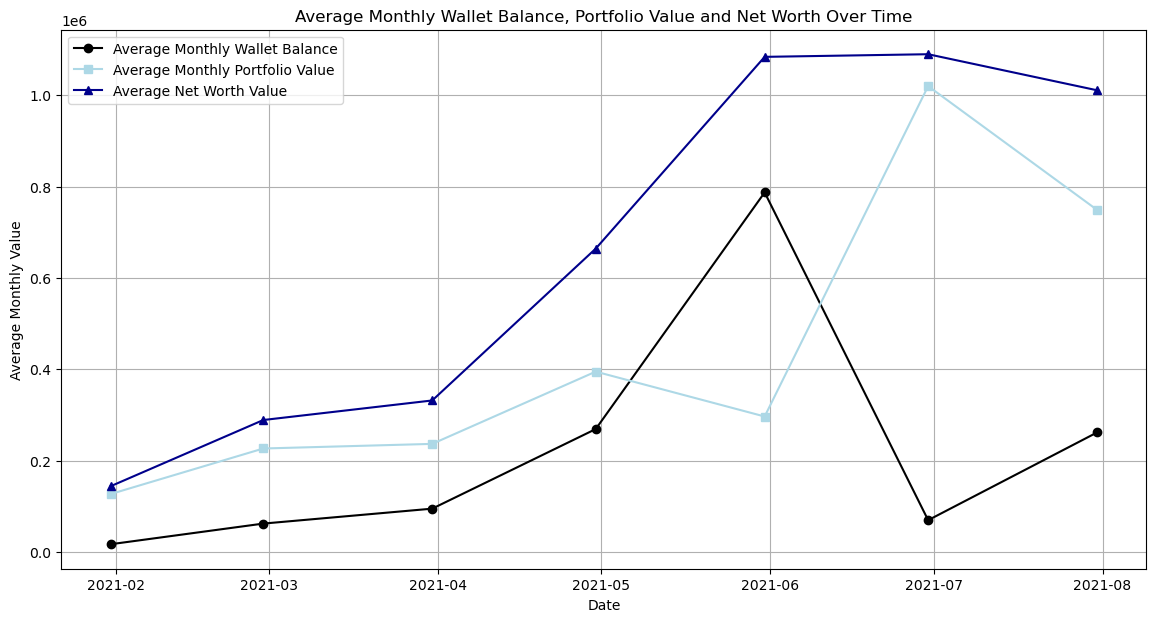

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Date' column is in datetime format
balance_portfolio_df['Date'] = pd.to_datetime(balance_portfolio_df['Date'])

# Set the 'Date' column as the index
balance_portfolio_df.set_index('Date', inplace=True)

# Resample the data to get monthly averages
monthly_data = balance_portfolio_df.resample('M').mean()

plt.figure(figsize=(14, 7))

# Plot the average monthly wallet balance with black color and circle markers
plt.plot(monthly_data.index, monthly_data['Wallet Balance'], label='Average Monthly Wallet Balance',
         color='black', marker='o')

# Plot the average monthly portfolio value with light blue color and square markers
plt.plot(monthly_data.index, monthly_data['Portfolio Value'], label='Average Monthly Portfolio Value',
         color='lightblue', marker='s')

# Plot the average monthly net worth value with dark blue color and triangle markers
# Note: Assuming 'Total Net Worth' is a column you've added that combines 'Wallet Balance' and 'Portfolio Value'
plt.plot(monthly_data.index, monthly_data['Total Net Worth'], label='Average Net Worth Value',
         color='darkblue', marker='^')

plt.title('Average Monthly Wallet Balance, Portfolio Value and Net Worth Over Time')
plt.xlabel('Date')
plt.ylabel('Average Monthly Value')
plt.legend()
plt.grid(True)
plt.show()

#### 3 Month Investment Timeline

In [39]:
import pandas as pd

# Initialize simulation parameters
initial_balance = 100000
portfolio = {}  # Dictionary to hold portfolio holdings: {asset_name: [quantity, purchase_price]}
balance = initial_balance

# Define strategy parameters
dynamic_stop_loss_threshold = 0.8  # Dynamic stop-loss threshold (80% of purchase price)
profit_target = 1.2  # Sell assets when they reach 120% of purchase price

balance_portfolio_df = pd.DataFrame(columns=['Date', 'Wallet Balance', 'Portfolio Value'])

stop_date = pd.to_datetime("2021-04-01")  # Define stop date

for date, daily_data in portfolio_optimization_df.groupby('Date'):
    current_date = pd.to_datetime(date)  # Convert to datetime for comparison
    if current_date > stop_date:
        break  # Stop the simulation if the current date exceeds the stop date

    # Selling assets from the portfolio if conditions are met (dynamic stop-loss and profit-taking)
    assets_to_remove = []
    for asset in portfolio.keys():
        asset_daily_data = daily_data[daily_data['Asset_Name'] == asset]
        if not asset_daily_data.empty:
            current_price = asset_daily_data.iloc[0]['Close']
            purchase_price = portfolio[asset][1]
            # Check for stop-loss and profit target
            if current_price < purchase_price * dynamic_stop_loss_threshold or current_price > purchase_price * profit_target:
                balance += portfolio[asset][0] * current_price
                assets_to_remove.append(asset)
    for asset in assets_to_remove:
        del portfolio[asset]

    # Identifying potential assets to buy based on positive predicted returns
    potential_buys = daily_data[daily_data['Predicted_percentage_return'] > 0]
    sorted_buys = potential_buys.sort_values(by='Predicted_percentage_return', ascending=False)

    # Dynamic allocation and buying logic
    if not sorted_buys.empty:
        investment_per_asset = balance / min(len(sorted_buys), 5)  # Limit number of assets to buy for diversification
        for _, row in sorted_buys.head(min(len(sorted_buys), 5)).iterrows():
            asset_name = row['Asset_Name']
            if asset_name not in portfolio and balance > 0:
                quantity = investment_per_asset / row['Close']
                portfolio[asset_name] = [quantity, row['Close']]
                balance -= investment_per_asset

    # Calculate Portfolio Value
    portfolio_value = 0
    for asset, (quantity, _) in portfolio.items():
        asset_daily_data = daily_data[daily_data['Asset_Name'] == asset]
        if not asset_daily_data.empty:
            current_price = asset_daily_data.iloc[0]['Close']
            portfolio_value += quantity * current_price
            
    # Append to DataFrame
    new_row_df = pd.DataFrame({'Date': [date], 'Wallet Balance': [balance], 'Portfolio Value': [portfolio_value]})
    balance_portfolio_df = pd.concat([balance_portfolio_df, new_row_df], ignore_index=True)

    # Print portfolio status for each date
    print(f"Date: {date}, Wallet Balance: {balance}, Portfolio Value: {portfolio_value}, Portfolio: {portfolio}")

# Final balance and portfolio
print(f"Final Wallet Balance: {balance}")
print(f"Final Portfolio Value: {portfolio_value}")
print("Final portfolio holdings:")
for asset, (quantity, purchase_price) in portfolio.items():
    print(f"{asset}: Quantity: {quantity}, Purchase Price: {purchase_price}")

Date: 2021-01-01 00:00:00, Wallet Balance: 0.0, Portfolio Value: 100000.0, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.0268666]}
Date: 2021-01-02 00:00:00, Wallet Balance: 0.0, Portfolio Value: 99750.243967633, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.0268666]}
Date: 2021-01-03 00:00:00, Wallet Balance: 0.0, Portfolio Value: 110433.31571144963, Portfolio: {'Stellar': [151252.3696204574, 0.1322293333333333], 'Cardano': [114254.59351071998, 0.1750476666666666], 'IOTA': [68728.52233676976, 0.291], 'Ethereum Classic': [3506.7007206269977, 5.703366666666668], 'TRON': [744418.7206419867, 0.026866

In [40]:
balance_portfolio_df['Total Net Worth'] = balance_portfolio_df['Wallet Balance'] + balance_portfolio_df['Portfolio Value']
balance_portfolio_df

,Date,Wallet Balance,Portfolio Value,Total Net Worth
0,2021-01-01,0.000000,100000.000000,100000.000000
1,2021-01-02,0.000000,99750.243968,99750.243968
2,2021-01-03,0.000000,110433.315711,110433.315711
3,2021-01-04,30113.248759,91732.268000,121845.516759
4,2021-01-05,43428.056052,82651.370306,126079.426357
...,...,...,...,...
86,2021-03-28,133545.560881,222131.408516,355676.969397
87,2021-03-29,133545.560881,229843.692722,363389.253602
88,2021-03-30,133545.560881,233662.721554,367208.282435
89,2021-03-31,168755.532464,244045.627195,412801.159659


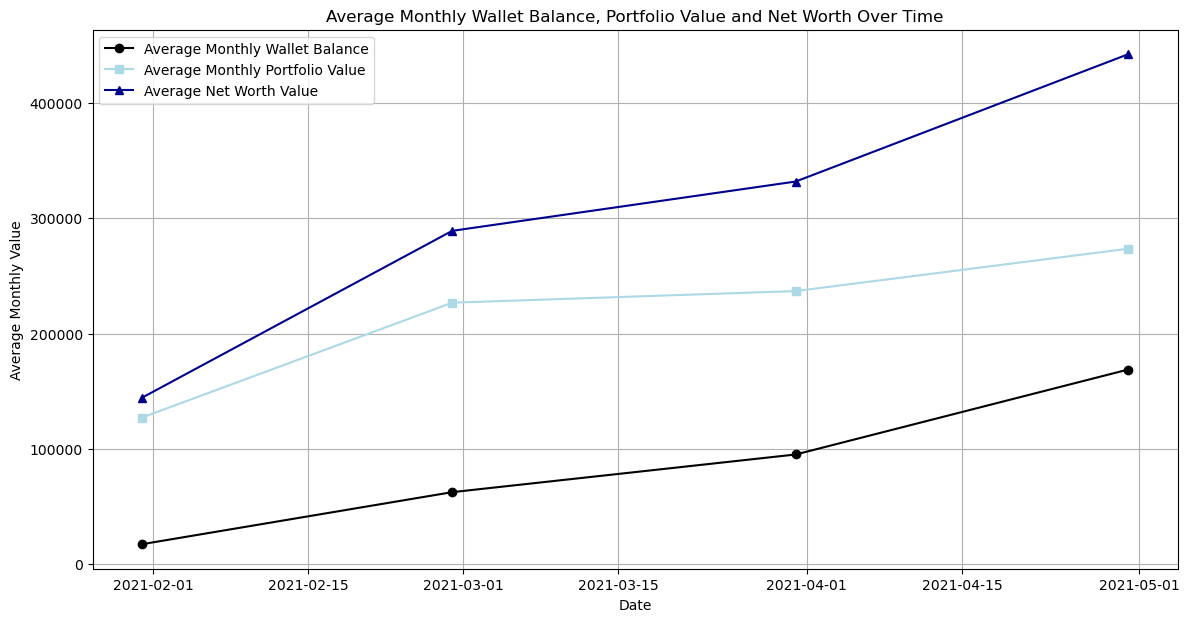

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Date' column is in datetime format
balance_portfolio_df['Date'] = pd.to_datetime(balance_portfolio_df['Date'])

# Set the 'Date' column as the index
balance_portfolio_df.set_index('Date', inplace=True)

# Resample the data to get monthly averages
monthly_data = balance_portfolio_df.resample('M').mean()

plt.figure(figsize=(14, 7))

# Plot the average monthly wallet balance with black color and circle markers
plt.plot(monthly_data.index, monthly_data['Wallet Balance'], label='Average Monthly Wallet Balance',
         color='black', marker='o')

# Plot the average monthly portfolio value with light blue color and square markers
plt.plot(monthly_data.index, monthly_data['Portfolio Value'], label='Average Monthly Portfolio Value',
         color='lightblue', marker='s')

# Plot the average monthly net worth value with dark blue color and triangle markers
# Note: Assuming 'Total Net Worth' is a column you've added that combines 'Wallet Balance' and 'Portfolio Value'
plt.plot(monthly_data.index, monthly_data['Total Net Worth'], label='Average Net Worth Value',
         color='darkblue', marker='^')

plt.title('Average Monthly Wallet Balance, Portfolio Value and Net Worth Over Time')
plt.xlabel('Date')
plt.ylabel('Average Monthly Value')
plt.legend()
plt.grid(True)
plt.show()